# Training and Confusion Matrix, ROC, AUC and Histogram
( Use flag to switch between dataset )

## Peformance Matrix of Models

1. Random Forest
  Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
  Best Accuracy while training: 96.72%
  Test Accuracy for training dataset: 97.56%
  ---Peformance Matrix for Random Forest---
    Accuracy: 97.56%
    Precision: 1.00
    Recall (Sensitivity): 0.95
    F1-score: 0.97
    Specificity: 1.00


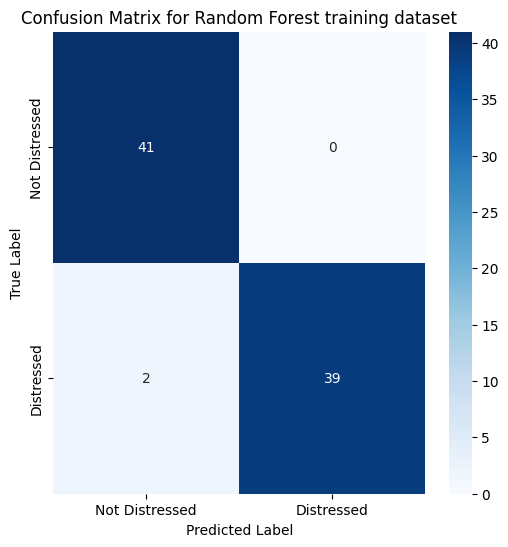

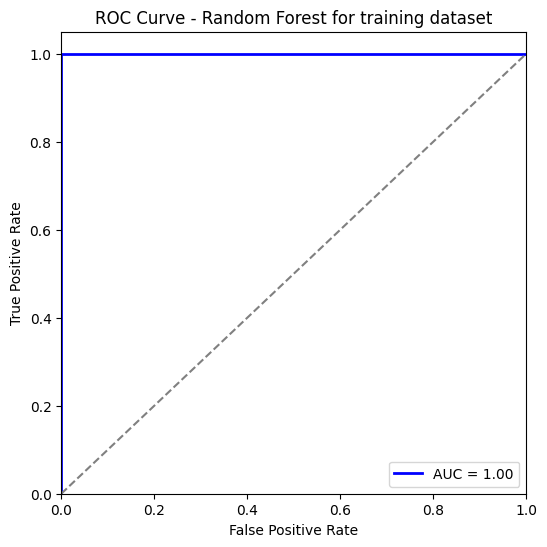

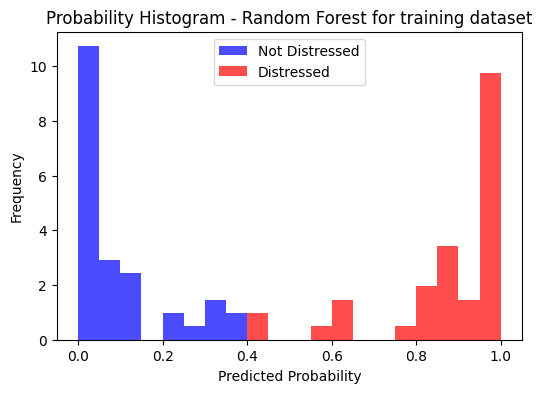

   ---Comparison with Z-score Dataset for Random Forest---

     Z-score Dataset - Accuracy: 46.15%
     Z-score Dataset - ROC AUC: 50.00%


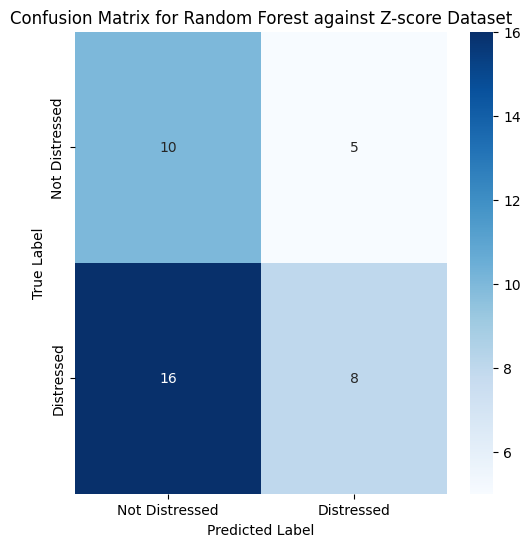

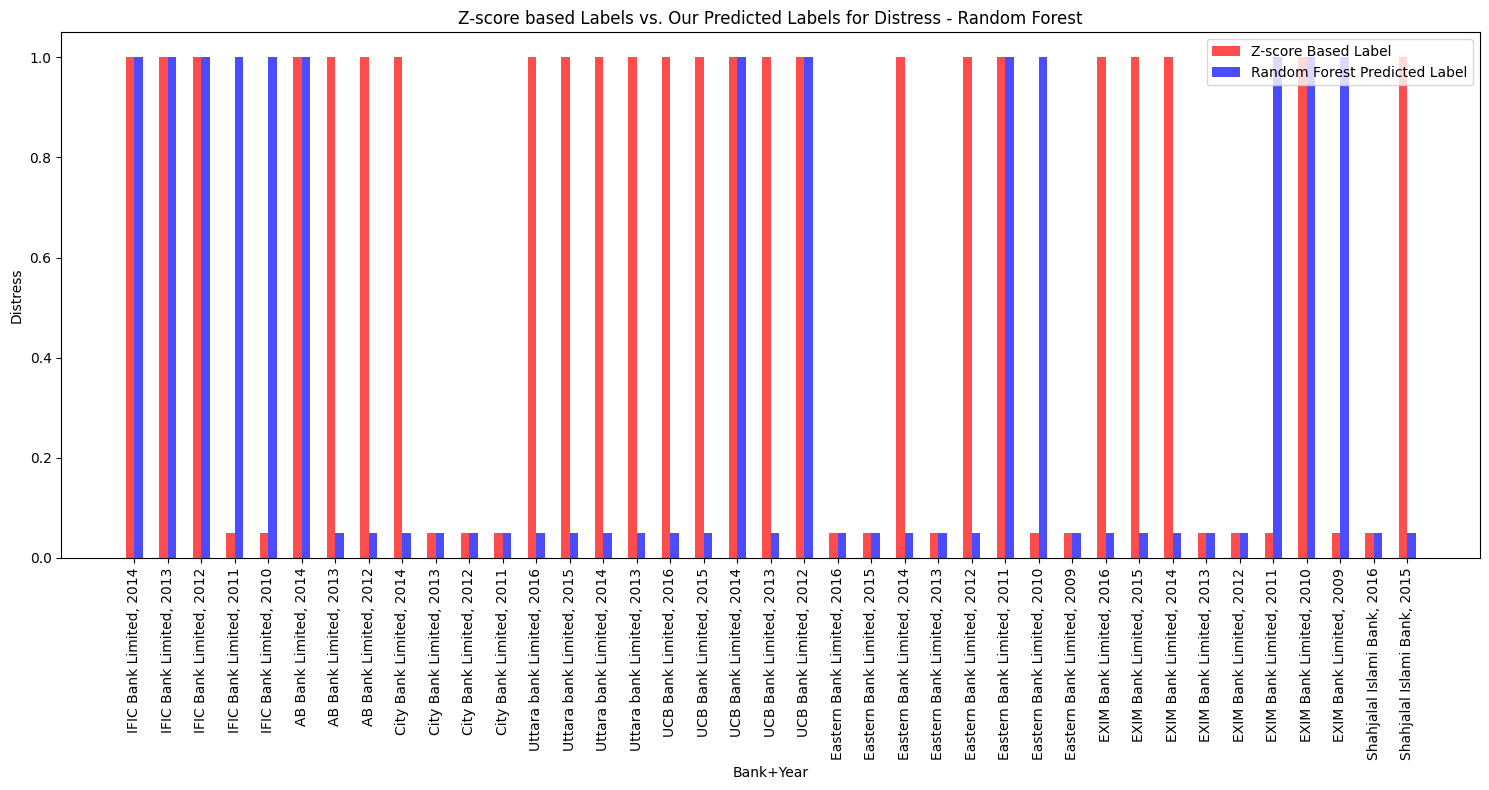

2. Gradient Boosting
  Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
  Best Accuracy while training: 94.26%
  Test Accuracy for training dataset: 96.34%
  ---Peformance Matrix for Gradient Boosting---
    Accuracy: 96.34%
    Precision: 1.00
    Recall (Sensitivity): 0.93
    F1-score: 0.96
    Specificity: 1.00


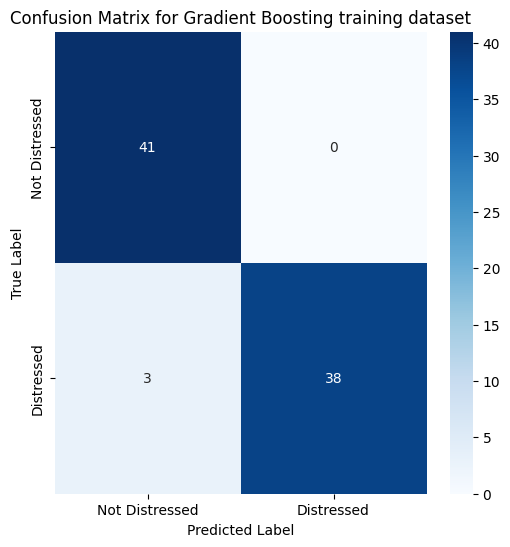

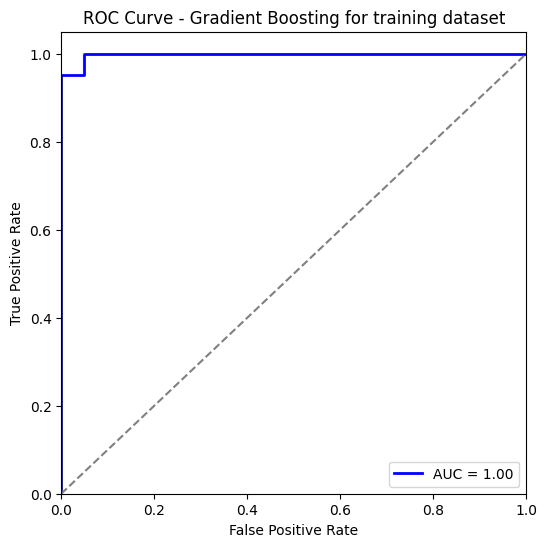

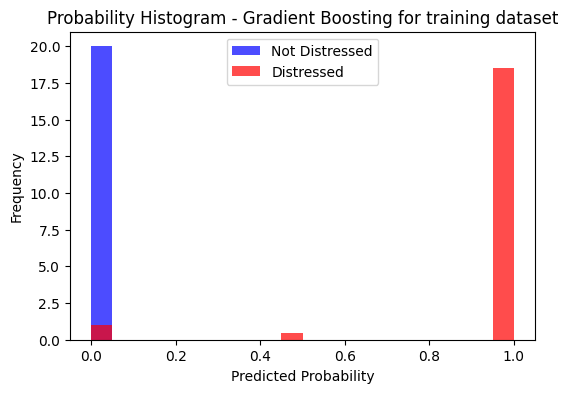

   ---Comparison with Z-score Dataset for Gradient Boosting---

     Z-score Dataset - Accuracy: 43.59%
     Z-score Dataset - ROC AUC: 47.92%


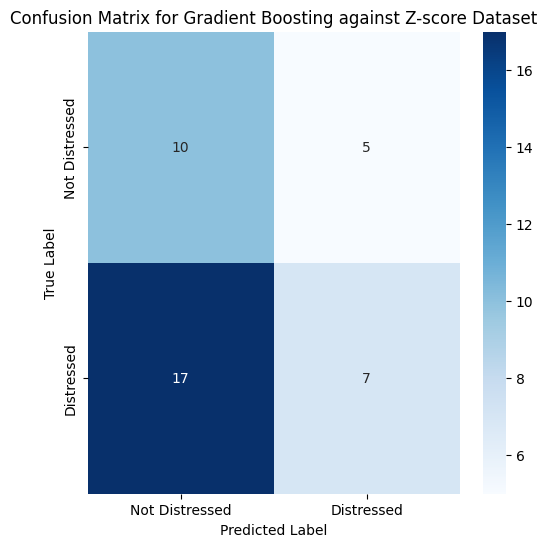

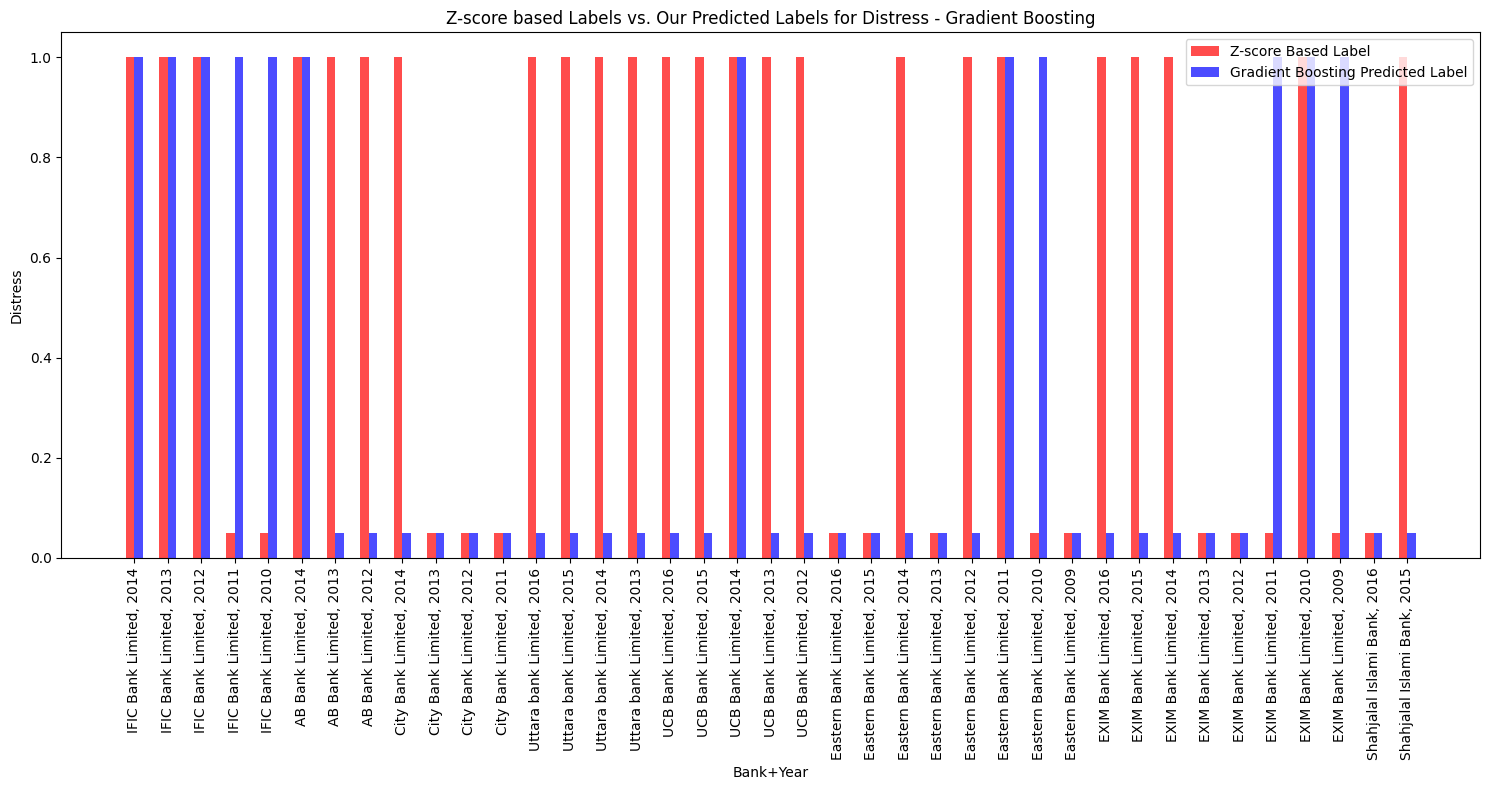

3. AdaBoost
  Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
  Best Accuracy while training: 94.26%
  Test Accuracy for training dataset: 96.34%
  ---Peformance Matrix for AdaBoost---
    Accuracy: 96.34%
    Precision: 1.00
    Recall (Sensitivity): 0.93
    F1-score: 0.96
    Specificity: 1.00


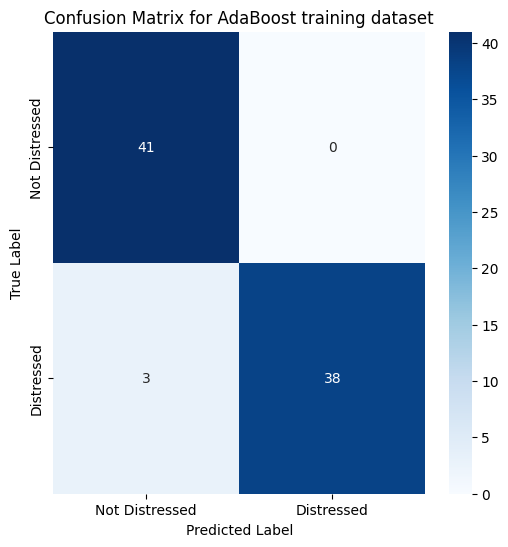

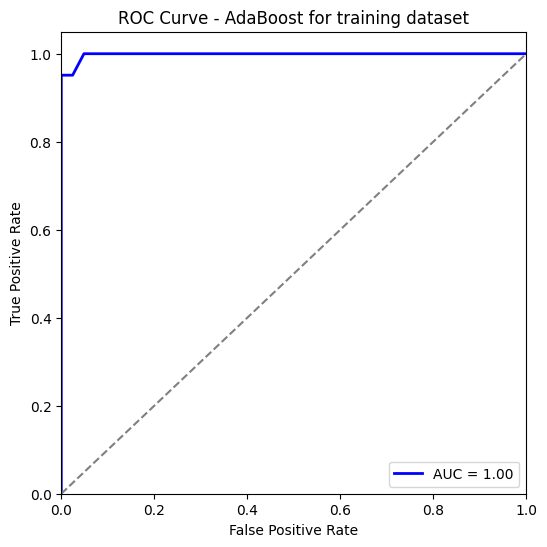

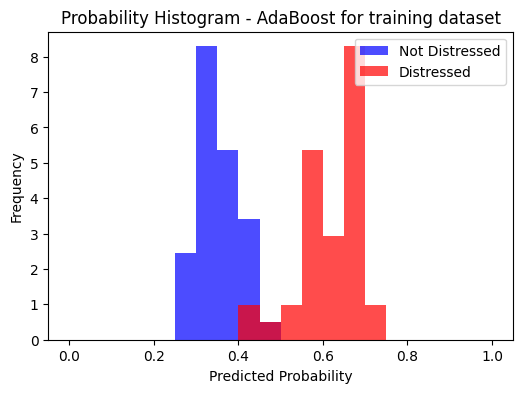

   ---Comparison with Z-score Dataset for AdaBoost---

     Z-score Dataset - Accuracy: 41.03%
     Z-score Dataset - ROC AUC: 48.33%


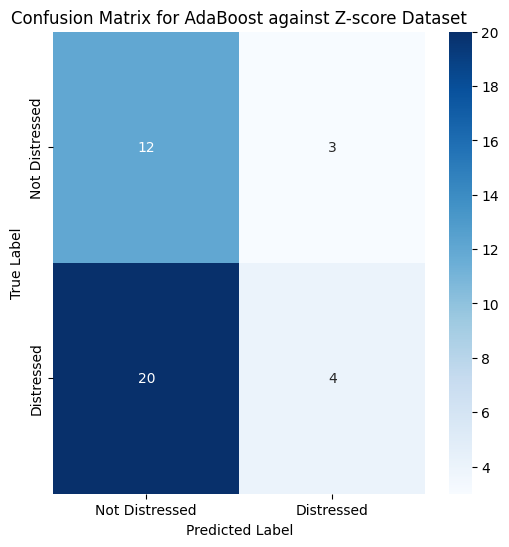

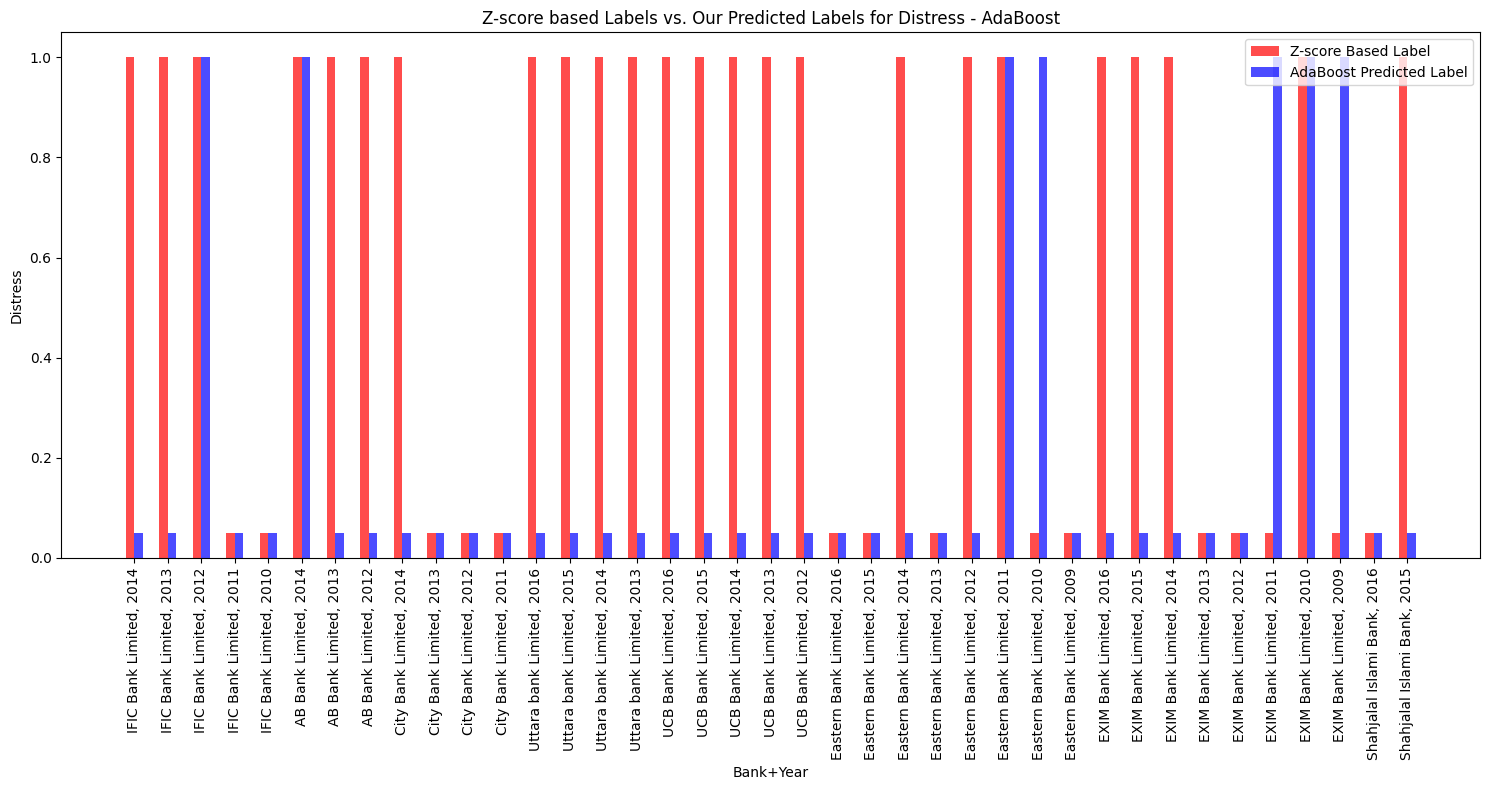

4. SVM
  Best parameters: {'C': 10, 'kernel': 'rbf', 'probability': True}
  Best Accuracy while training: 93.44%
  Test Accuracy for training dataset: 97.56%
  ---Peformance Matrix for SVM---
    Accuracy: 97.56%
    Precision: 0.98
    Recall (Sensitivity): 0.98
    F1-score: 0.98
    Specificity: 0.98


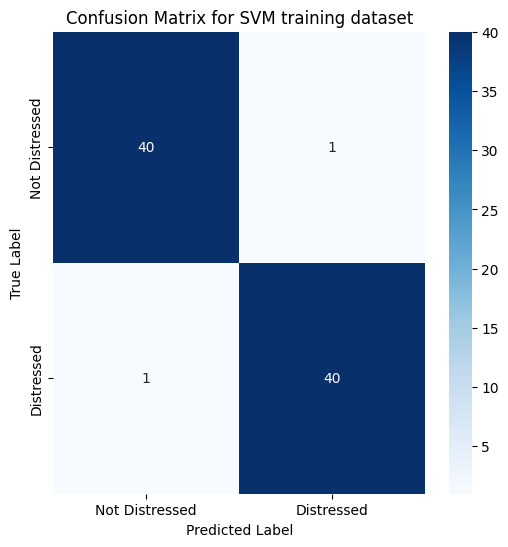

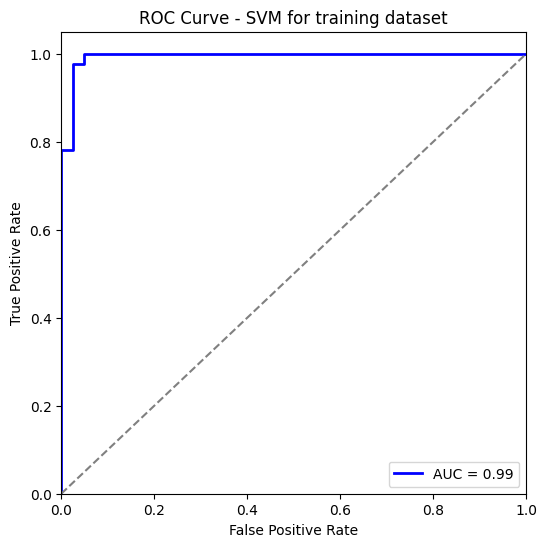

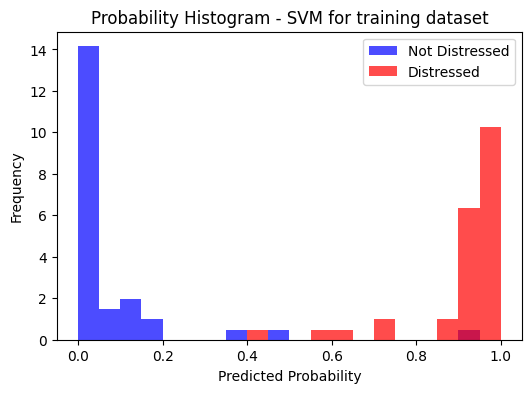

   ---Comparison with Z-score Dataset for SVM---

     Z-score Dataset - Accuracy: 43.59%
     Z-score Dataset - ROC AUC: 52.92%


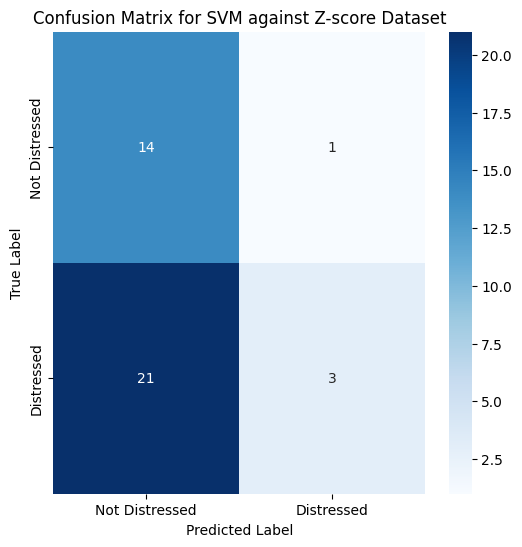

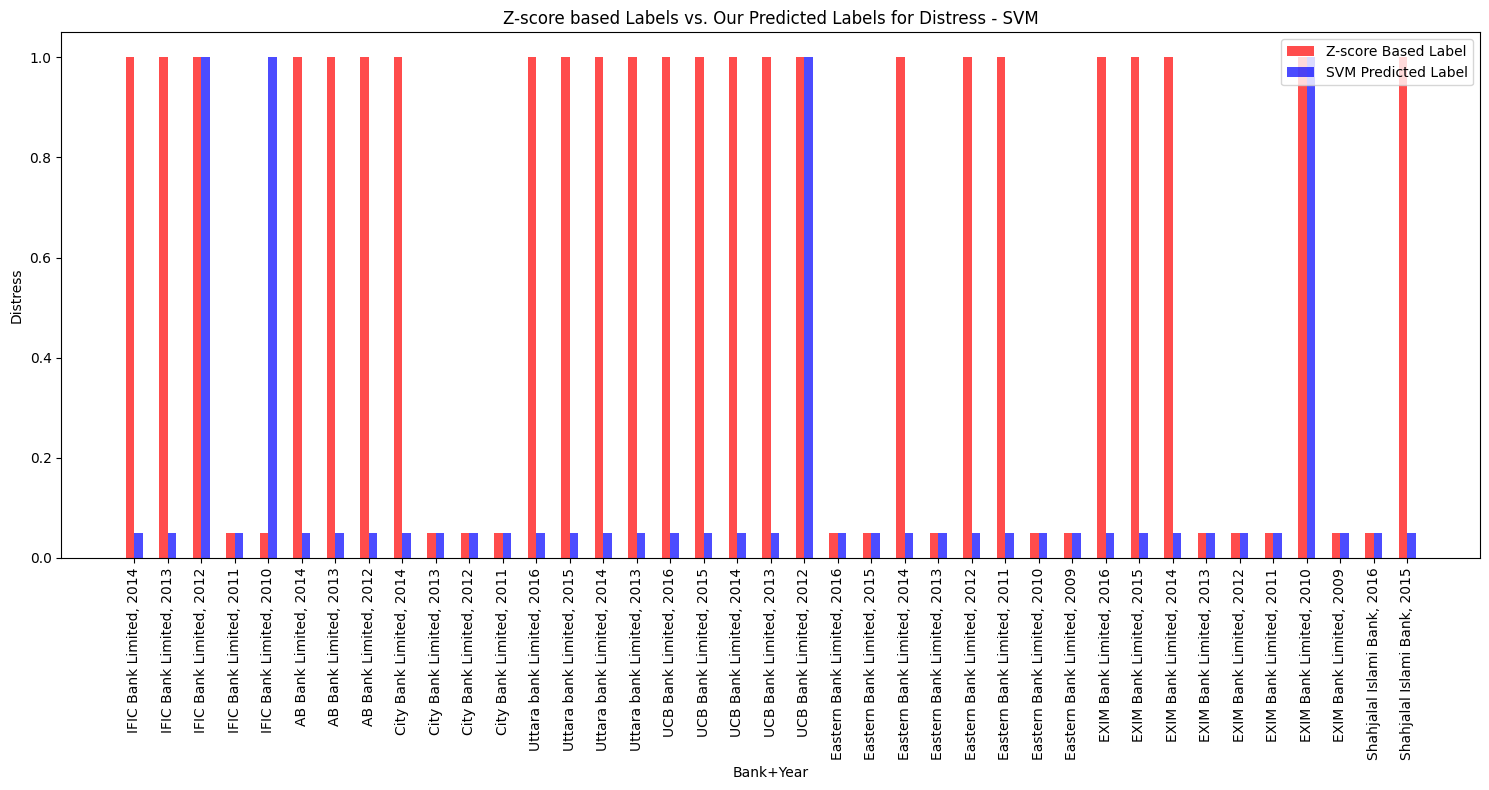

5. Logistic Regression
  Best parameters: {'C': 10}
  Best Accuracy while training: 83.61%
  Test Accuracy for training dataset: 76.83%
  ---Peformance Matrix for Logistic Regression---
    Accuracy: 76.83%
    Precision: 0.96
    Recall (Sensitivity): 0.56
    F1-score: 0.71
    Specificity: 0.98


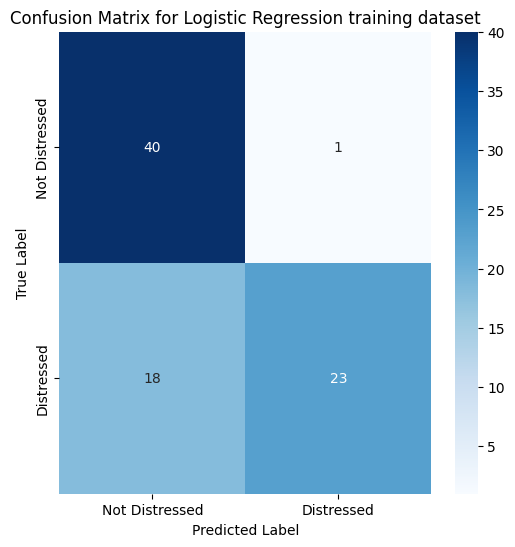

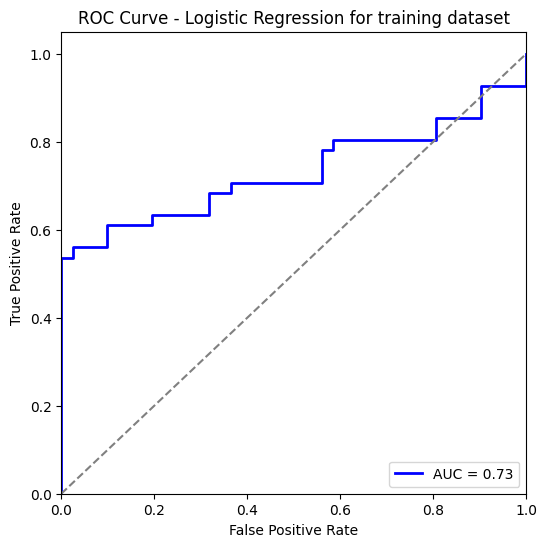

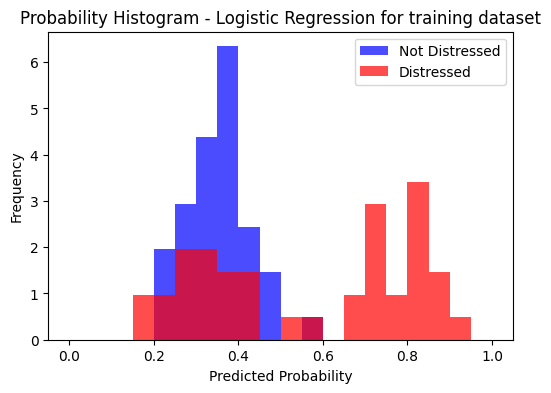

   ---Comparison with Z-score Dataset for Logistic Regression---

     Z-score Dataset - Accuracy: 43.59%
     Z-score Dataset - ROC AUC: 52.92%


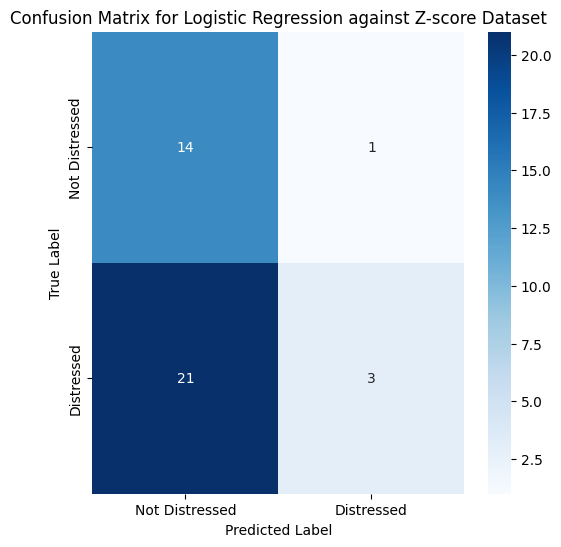

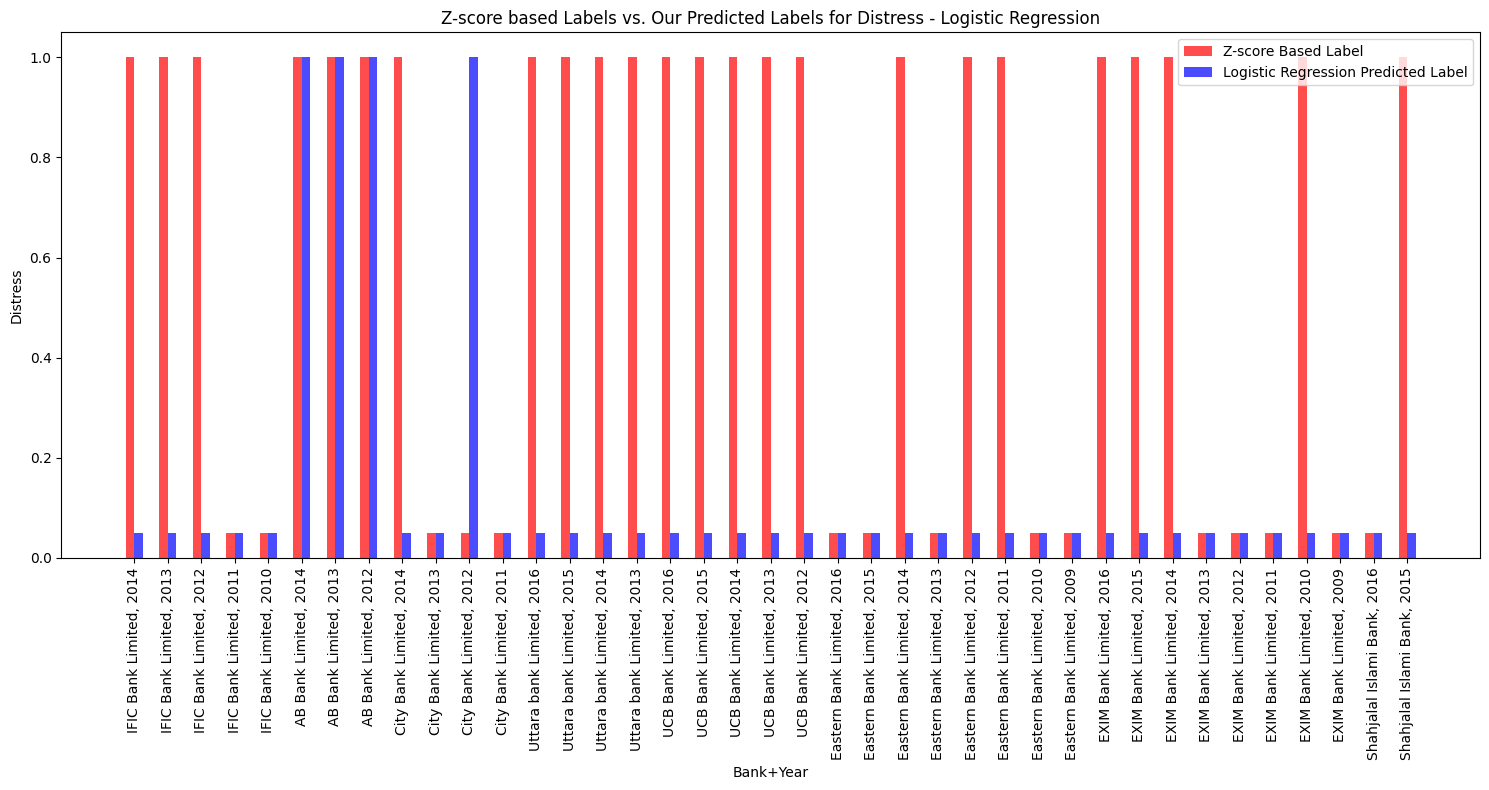

6. K-Nearest Neighbors
  Best parameters: {'n_neighbors': 5}
  Best Accuracy while training: 88.52%
  Test Accuracy for training dataset: 91.46%
  ---Peformance Matrix for K-Nearest Neighbors---
    Accuracy: 91.46%
    Precision: 0.95
    Recall (Sensitivity): 0.88
    F1-score: 0.91
    Specificity: 0.95


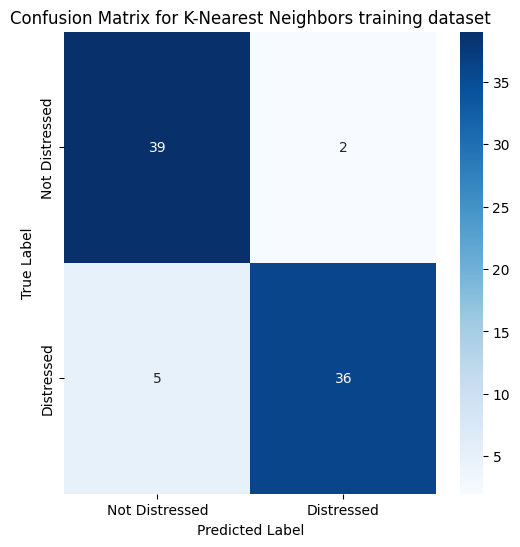

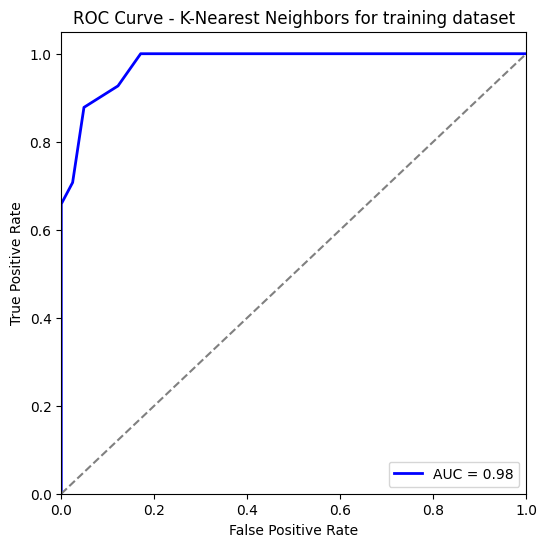

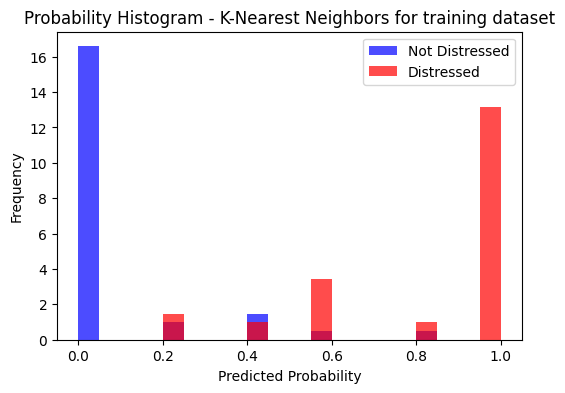

   ---Comparison with Z-score Dataset for K-Nearest Neighbors---

     Z-score Dataset - Accuracy: 41.03%
     Z-score Dataset - ROC AUC: 52.08%


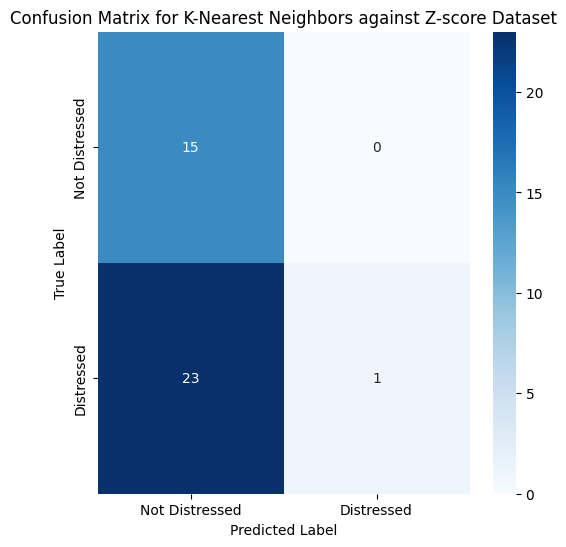

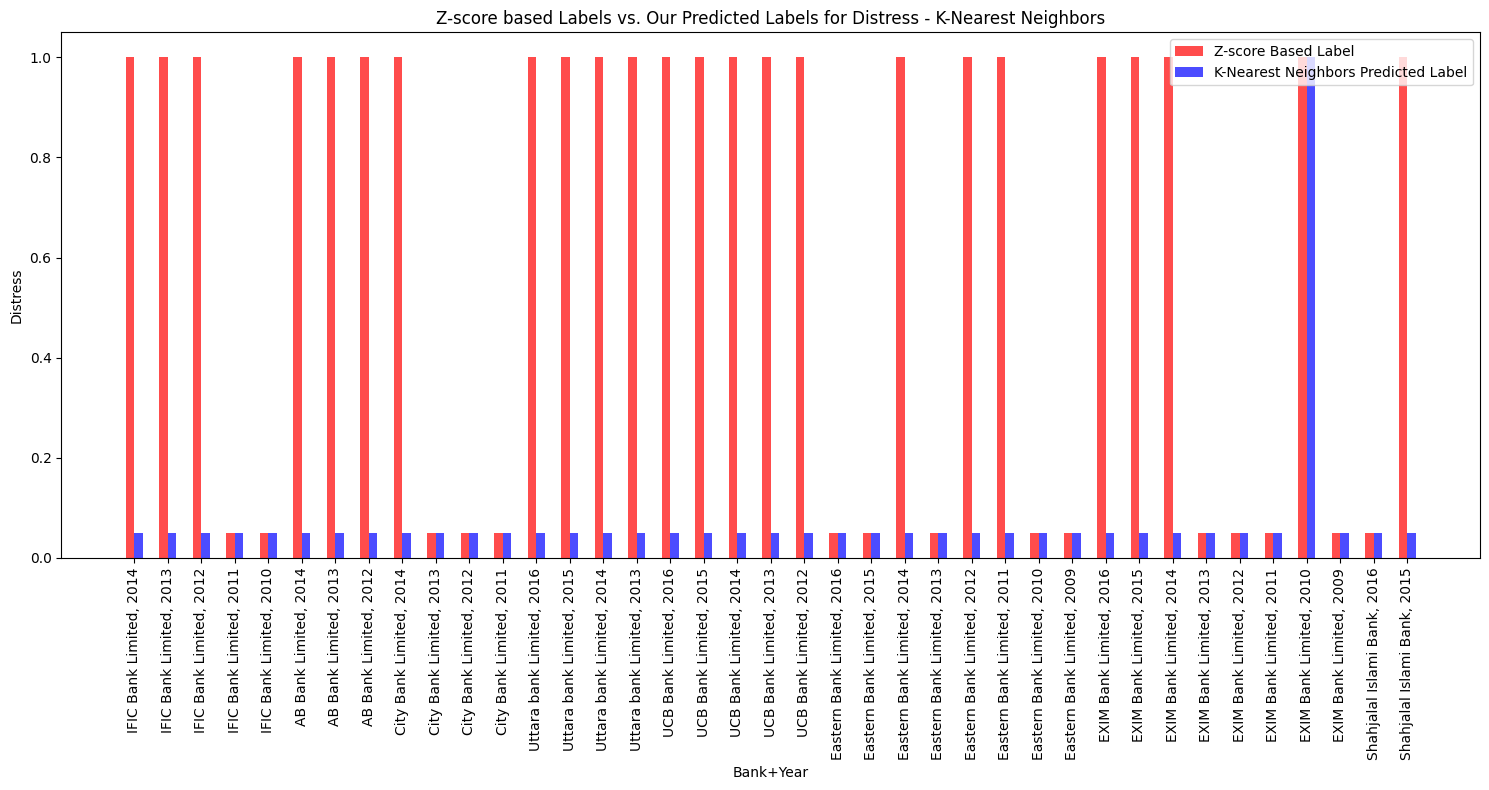

7. Decision Tree
  Best parameters: {'max_depth': 15, 'min_samples_split': 2}
  Best Accuracy while training: 94.26%
  Test Accuracy for training dataset: 97.56%
  ---Peformance Matrix for Decision Tree---
    Accuracy: 97.56%
    Precision: 1.00
    Recall (Sensitivity): 0.95
    F1-score: 0.97
    Specificity: 1.00


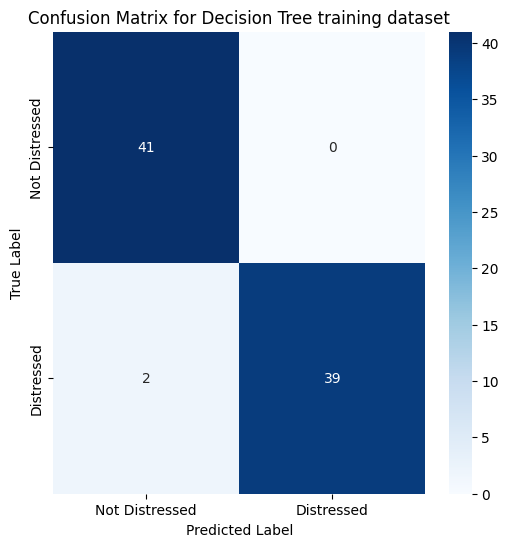

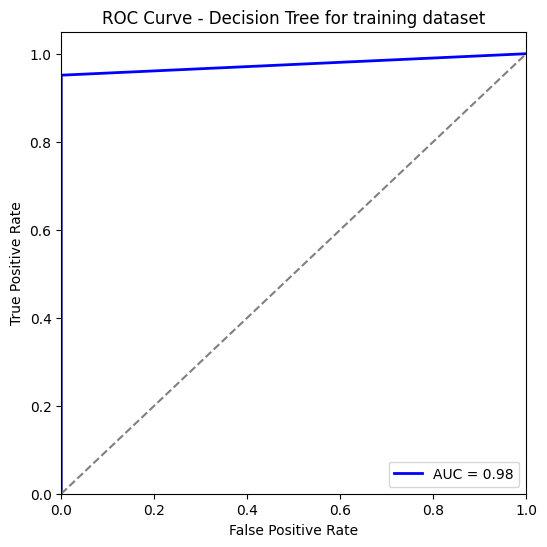

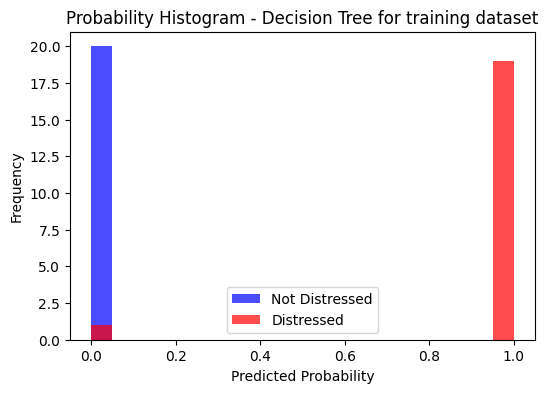

   ---Comparison with Z-score Dataset for Decision Tree---

     Z-score Dataset - Accuracy: 43.59%
     Z-score Dataset - ROC AUC: 47.92%


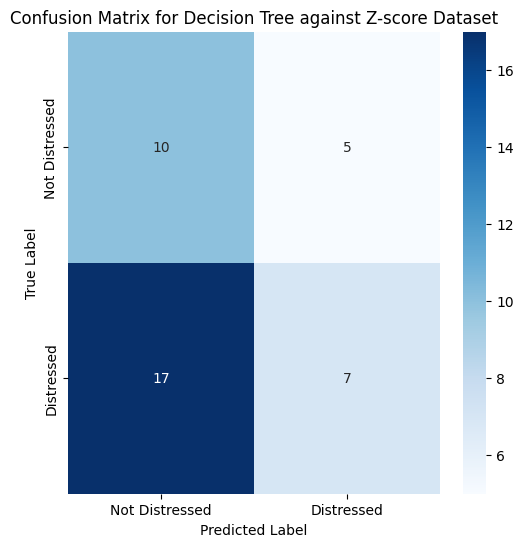

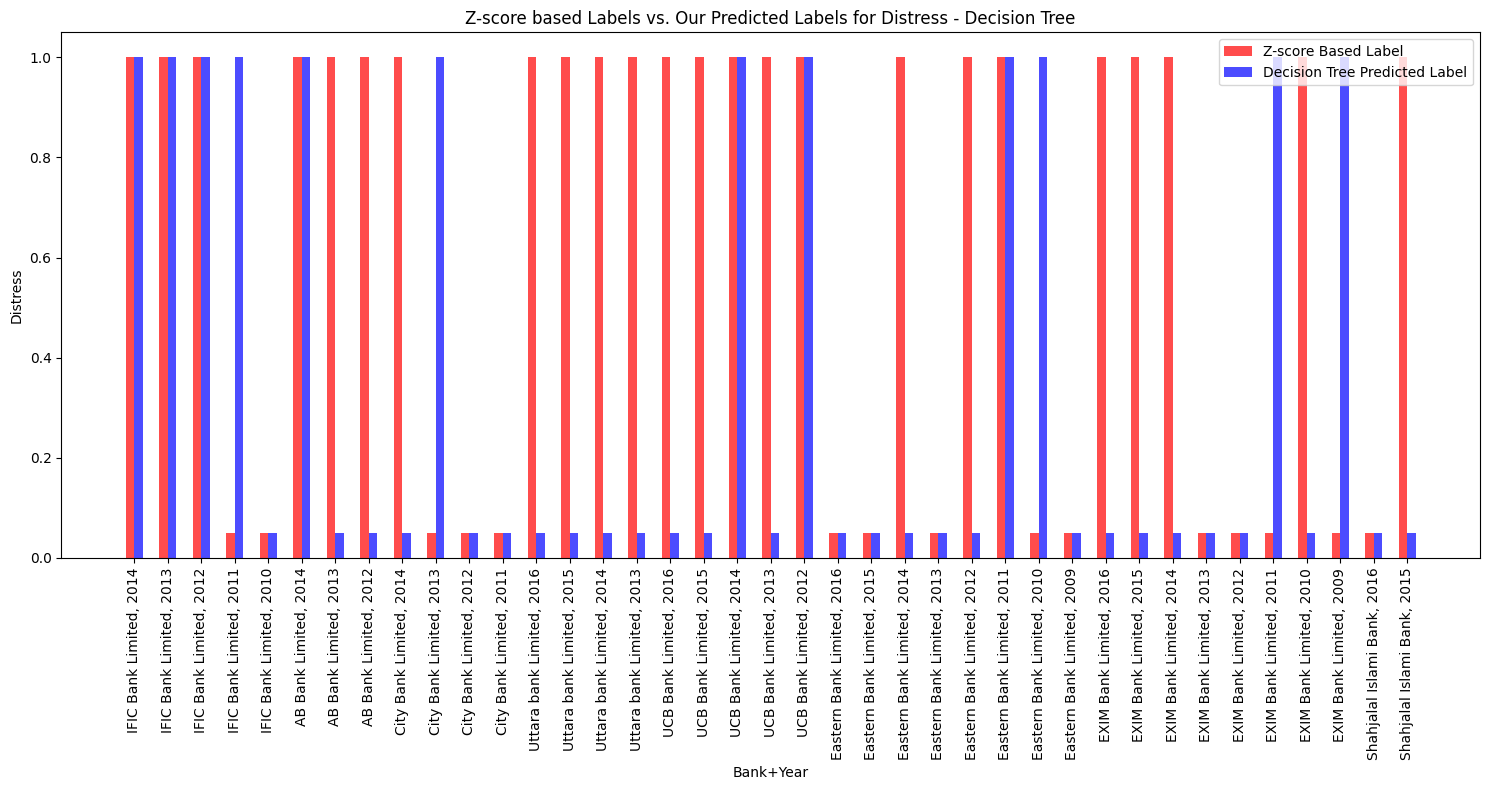

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, f1_score

np.random.seed(42)

# flag 1 for b_data_matrix.csv, 2 for b_data_z_new_matrix and 3 for zm_bank_data
dataset_flag = 3

if dataset_flag==1:
  data = pd.read_csv("b_data_matrix.csv")
  label_encoder = LabelEncoder()
  data['Bank'] = label_encoder.fit_transform(data['Bank'])

  X = data.drop(['distress-flag-matrix'], axis=1)
  y = data['distress-flag-matrix']
elif dataset_flag==2:
  data = pd.read_csv("b_data_z_new_matrix.csv")
  label_encoder = LabelEncoder()
  data['Bank'] = label_encoder.fit_transform(data['Bank'])

  X = data.drop(['Z-score', 'distress-flag-z', 'distress-flag-matrix'], axis=1)
  y = data['distress-flag-matrix']
elif dataset_flag==3:
  data = pd.read_csv("cr_data.csv")
  label_encoder = LabelEncoder()
  data['Bank'] = label_encoder.fit_transform(data['Bank'])

  X = data.drop(['Bank', 'Year', 'Credit Rating', 'Flag'], axis=1)
  y = data['Flag']
else:
  data = pd.read_csv("zm_bank_data.csv")
  label_encoder = LabelEncoder()
  data['Bank'] = label_encoder.fit_transform(data['Bank'])

  X = data.drop(['Z-score', 'distress-flag'], axis=1)
  y = data['distress-flag']

# Oversampling for class imbalance
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, stratify=y_resampled, random_state=42)

# Use StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Models with parameters
models = [
    ('Random Forest', RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.01, n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(learning_rate=0.1, n_estimators=50)),
    ('SVM', SVC(C=1, kernel='linear')),
    ('Logistic Regression', LogisticRegression(C=0.1)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5, min_samples_split=5))
]

accuracy_scores = {}
accuracy_test_scores = {}

# Hyperparameter tuning and model evaluation with StratifiedKFold
for key, models in enumerate(models):
    name=models[0]
    model=models[1]

    param_grid = {}

    if name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
    elif name == 'Gradient Boosting':
        param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}
    elif name == 'AdaBoost':
        param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}
    elif name == 'SVM':
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'probability':[True]}
    elif name == 'Logistic Regression':
        param_grid = {'C': [0.1, 1, 10]}
    elif name == 'K-Nearest Neighbors':
        param_grid = {'n_neighbors': [3, 5, 7]}
    elif name == 'Decision Tree':
        param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}

    clf = GridSearchCV(model, param_grid, cv=skf)
    clf.fit(X_train, y_train)

    print(f"{key+1}. {name}")
    print(f"  Best parameters: {clf.best_params_}")
    print(f"  Best Accuracy while training: {clf.best_score_*100:.2f}%")

    # Train the best model on the full training set
    best_model = clf.best_estimator_
    best_model.fit(X_train, y_train)

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"  Test Accuracy for training dataset: {accuracy*100:.2f}%")

    cm = confusion_matrix(y_test, y_pred)

    # Model performance matrix overview
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    print(f"  ---Peformance Matrix for {name}---")
    print(f"    Accuracy: {accuracy*100:.2f}%")
    print(f"    Precision: {precision:.2f}")
    print(f"    Recall (Sensitivity): {recall:.2f}")
    print(f"    F1-score: {f1:.2f}")
    print(f"    Specificity: {specificity:.2f}")

    class_labels = ['Not Distressed', 'Distressed']
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {name} training dataset')
    plt.show()

    # save the accuracy for comparison graph
    accuracy_scores[name] = accuracy*100

    # ROC curve
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name} for training dataset')
    plt.legend(loc='lower right')
    plt.show()

    # Histogram
    plt.figure(figsize=(6, 4))
    plt.hist(y_pred_prob[y_test == 0], bins=20, color='blue', alpha=0.7, label='Not Distressed', density=True, range=(0, 1))
    plt.hist(y_pred_prob[y_test == 1], bins=20, color='red', alpha=0.7, label='Distressed', density=True, range=(0, 1))
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title(f'Probability Histogram - {name} for training dataset')
    plt.legend()
    plt.show()

    # Unseen data load and prdict class
    unseen_data = pd.read_csv("b_data.csv")

    X_unseen = unseen_data.drop(['Bank', 'Year', 'Z-score', 'Flag'], axis=1)
    unseen_labels = unseen_data['Flag']

    y_unseen_pred = best_model.predict(X_unseen)

    accuracy_unseen = accuracy_score(unseen_labels, y_unseen_pred)
    roc_auc_unseen = roc_auc_score(unseen_labels, y_unseen_pred)

    print(f'   ---Comparison with Z-score Dataset for {name}---\n')
    print(f"     Z-score Dataset - Accuracy: {accuracy_unseen*100:.2f}%")
    print(f"     Z-score Dataset - ROC AUC: {roc_auc_unseen*100:.2f}%")

    accuracy_test_scores[name] = accuracy_unseen*100

    conf_matrix = confusion_matrix(unseen_labels, y_unseen_pred)
    class_labels = ['Not Distressed', 'Distressed']
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {name} against Z-score Dataset')
    plt.show()

    # show comparison between z-score labels and predicted labels for each model.

    y_unseen_pred = best_model.predict(X_unseen).ravel()

    unseen_data['Bank+Year'] = unseen_data['Bank'] + ', ' + unseen_data['Year'].astype(str)

    bar_data = pd.DataFrame({'Bank+Year': unseen_data['Bank+Year'], 'Original': unseen_labels, 'Predicted': y_unseen_pred})

    bar_data['Original'] = bar_data['Original'].replace(0, 0.05)
    bar_data['Predicted'] = bar_data['Predicted'].replace(0, 0.05)

    plt.figure(figsize=(15, 8))
    bar_width = 0.25
    bar_positions = np.arange(len(bar_data))

    plt.bar(bar_positions, bar_data['Original'], width=bar_width, align='center', color='red', alpha=0.7, label='Z-score Based Label')
    plt.bar(bar_positions + bar_width, bar_data['Predicted'], width=bar_width, align='center', alpha=0.7, color='blue', label=f'{name} Predicted Label')

    plt.xlabel('Bank+Year')
    plt.ylabel('Distress')
    plt.title(f'Z-score based Labels vs. Our Predicted Labels for Distress - {name}')
    plt.xticks(bar_positions + bar_width / 2, bar_data['Bank+Year'], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ANN Model With Hyperparameter Tuning

Create the model

<ipython-input-7-415478c1d4e3>:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_model, epochs=epoch_count, batch_size=32, verbose=0)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
3/3 [==============================] - 0s 4ms/step


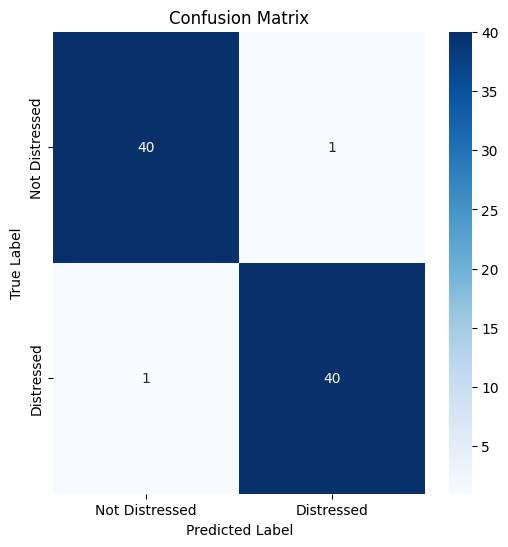

Best Hyperparameters conf:
{'dropout_rate': 0.2, 'units': 128}
3/3 [==============================] - 0s 3ms/step


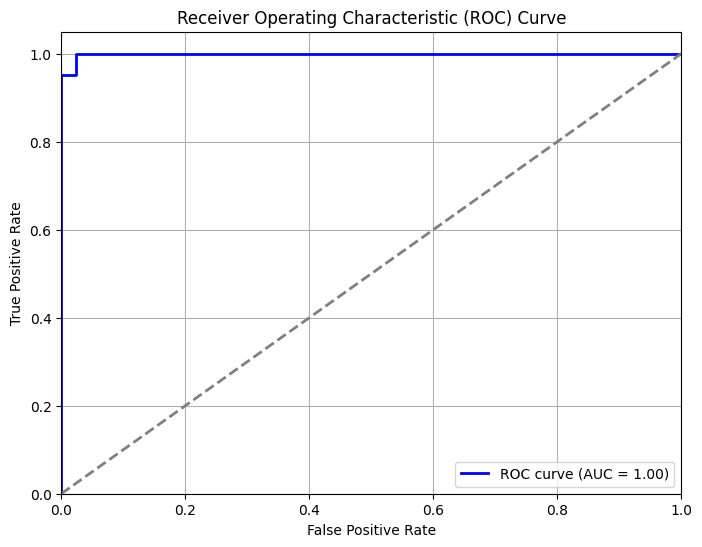

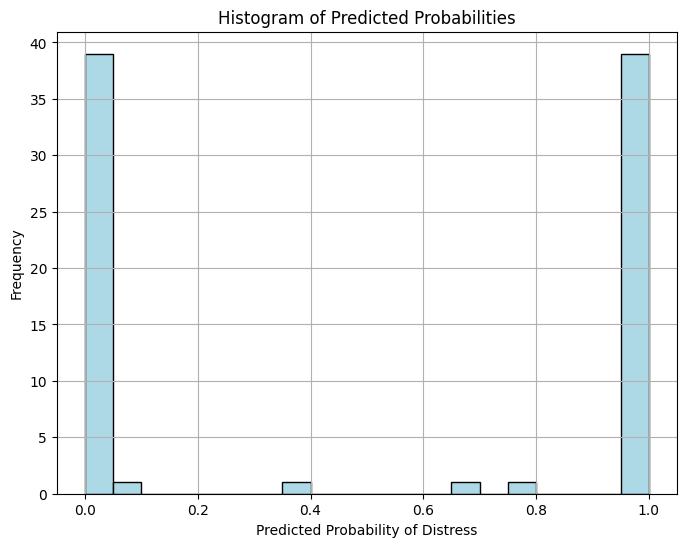

---ANN Peformance Matrix---

  Accuracy: 97.56%
  Precision: 0.98
  Recall (Sensitivity): 0.98
  F1-score: 0.98

  Specificity: 0.98
2/2 [==============================] - 0s 5ms/step
---Comparison with Z-Score Dataset---

Accuracy for Z-score Dataset: 38.46%
ROC AUC for Z-score Dataset: 50.00%


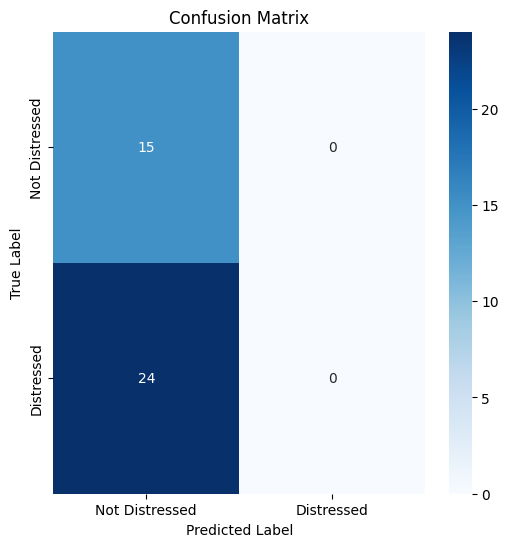

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, auc
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, f1_score

# configure model here (too many epoch can overfit the model)
epoch_count = 70
dataset_flag = 3

def create_model(units=128, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(units, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_classifier = KerasClassifier(build_fn=create_model, epochs=epoch_count, batch_size=32, verbose=0)

if dataset_flag==1:
  data = pd.read_csv("b_data_matrix.csv")
  label_encoder = LabelEncoder()
  data['Bank'] = label_encoder.fit_transform(data['Bank'])

  X = data.drop(['distress-flag-matrix'], axis=1)
  y = data['distress-flag-matrix']
elif dataset_flag==2:
  data = pd.read_csv("b_data_z_new_matrix.csv")
  label_encoder = LabelEncoder()
  data['Bank'] = label_encoder.fit_transform(data['Bank'])

  X = data.drop(['Z-score', 'distress-flag-z', 'distress-flag-matrix'], axis=1)
  y = data['distress-flag-matrix']
elif dataset_flag==3:
  data = pd.read_csv("cr_data.csv")
  label_encoder = LabelEncoder()
  data['Bank'] = label_encoder.fit_transform(data['Bank'])

  X = data.drop(['Bank', 'Year', 'Credit Rating', 'Flag'], axis=1)
  y = data['Flag']
else:
  data = pd.read_csv("zm_bank_data.csv")
  label_encoder = LabelEncoder()
  data['Bank'] = label_encoder.fit_transform(data['Bank'])

  X = data.drop(['Z-score', 'distress-flag'], axis=1)
  y = data['distress-flag']

# create as mnay feature as you want or skip
# data['ROA_ROE_ratio'] = data['Return on Assets Ratio (ROA)'] / data['Return on equity Ratio(ROE)']
# data['CAR_ROI_ratio'] = data['Capital adequacy ratio (CAR)'] / data['Return on investment Ratio(ROI)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, stratify=y_resampled, random_state=42)

# set parameters and search for best configurations
# too many units will lead to overfitting so have to keep it low
param_grid = {
    'units': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4]
}
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, cv=StratifiedKFold(n_splits=2), verbose=1)

grid_result = grid_search.fit(X_train, y_train)

best_model = grid_result.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)


# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
class_labels = ['Not Distressed', 'Distressed']
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Best Hyperparameters conf:")
print(grid_result.best_params_)

y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob, bins=20, edgecolor='k', color='lightblue')
plt.xlabel('Predicted Probability of Distress')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.grid(True)
plt.show()

# Model performance matrix overview
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("---ANN Peformance Matrix---\n")
print(f"  Accuracy: {accuracy*100:.2f}%")
print(f"  Precision: {precision:.2f}")
print(f"  Recall (Sensitivity): {recall:.2f}")
print(f"  F1-score: {f1:.2f}\n")
print(f"  Specificity: {specificity:.2f}")

# save for comparison graph
accuracy_scores['ANN'] = accuracy*100

# Comparison with z-score dataset labels
unseen_data = pd.read_csv("b_data.csv")

X_unseen = unseen_data.drop(['Bank', 'Year', 'Z-score', 'Flag'], axis=1)
unseen_labels = unseen_data['Flag']

y_unseen_pred = best_model.predict(X_unseen)

accuracy_unseen = accuracy_score(unseen_labels, y_unseen_pred)
roc_auc_unseen = roc_auc_score(unseen_labels, y_unseen_pred)

print('---Comparison with Z-Score Dataset---\n')
print(f"Accuracy for Z-score Dataset: {accuracy_unseen*100:.2f}%")
print(f"ROC AUC for Z-score Dataset: {roc_auc_unseen*100:.2f}%")

accuracy_test_scores[name] = accuracy_unseen*100

conf_matrix = confusion_matrix(unseen_labels, y_unseen_pred)
class_labels = ['Not Distressed', 'Distressed']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


We won't use BNN or CNN as that required thousands of data points

2/2 [==============================] - 0s 5ms/step


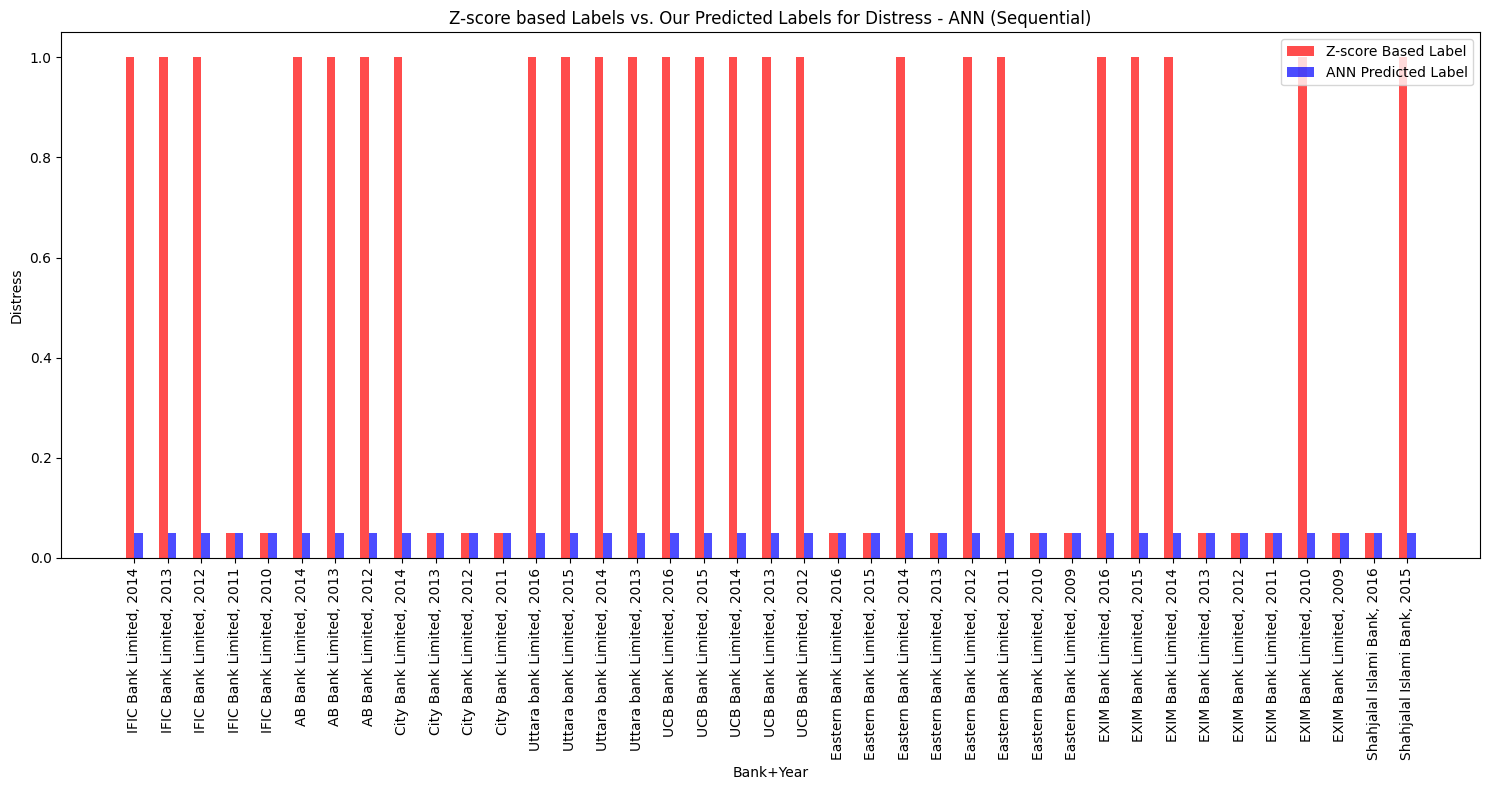

In [ ]:
y_unseen_pred = best_model.predict(X_unseen).ravel()

unseen_data['Bank+Year'] = unseen_data['Bank'] + ', ' + unseen_data['Year'].astype(str)

bar_data = pd.DataFrame({'Bank+Year': unseen_data['Bank+Year'], 'Original': unseen_labels, 'Predicted': y_unseen_pred})

bar_data['Original'] = bar_data['Original'].replace(0, 0.05)
bar_data['Predicted'] = bar_data['Predicted'].replace(0, 0.05)

plt.figure(figsize=(15, 8))
bar_width = 0.25
bar_positions = np.arange(len(bar_data))

plt.bar(bar_positions, bar_data['Original'], width=bar_width, align='center', color='red', alpha=0.7, label='Z-score Based Label')
plt.bar(bar_positions + bar_width, bar_data['Predicted'], width=bar_width, align='center', alpha=0.7, color='blue', label='ANN Predicted Label')

plt.xlabel('Bank+Year')
plt.ylabel('Distress')
plt.title('Z-score based Labels vs. Our Predicted Labels for Distress - ANN (Sequential)')
plt.xticks(bar_positions + bar_width / 2, bar_data['Bank+Year'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Accuracy comparison plot for all the models for training dataset and Z-score dataset

## Training Dataset Graph

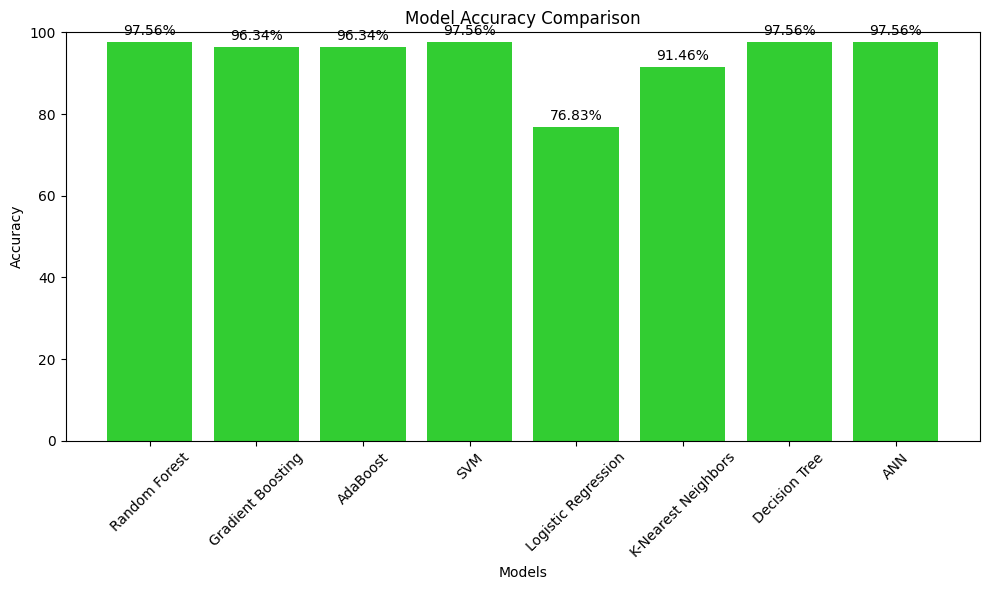

In [ ]:
models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='limegreen')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.xticks(rotation=45)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{acc:.2f}%',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## For Z-score dataset

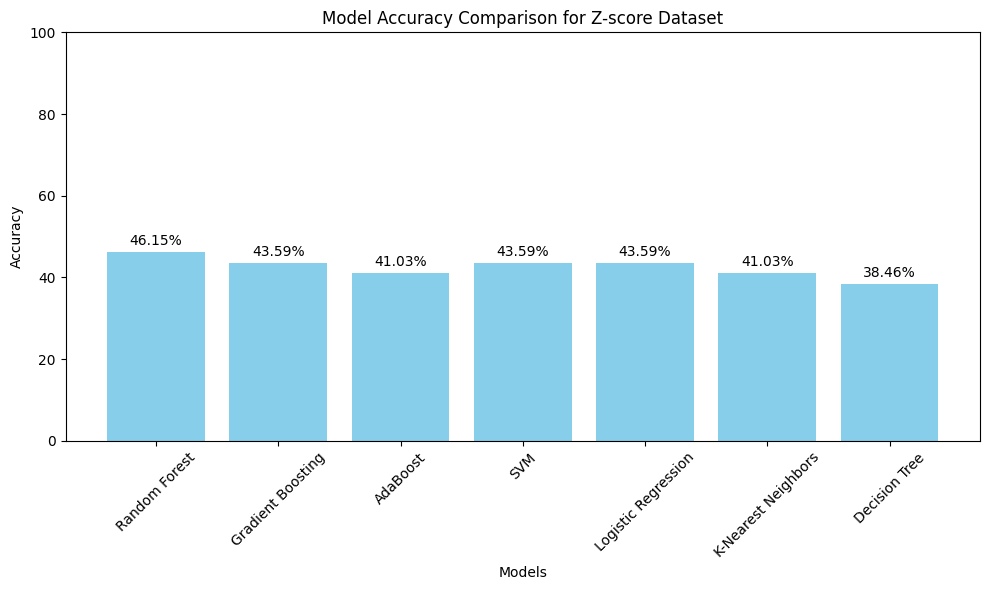

In [ ]:
models = list(accuracy_test_scores.keys())
accuracies = list(accuracy_test_scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Z-score Dataset')
plt.ylim(0, 100)
plt.xticks(rotation=45)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{acc:.2f}%',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()